# data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)
#create DataFrame
df=pd.read_csv(r"Visadataset.csv")
print(df.shape)

(25480, 12)


# data cleaning 
handling missing values,duplicates check data type ,understand dataset

In [2]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]

for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), "% missing")

In [3]:
features_with_na

[]

no null values

In [9]:
df.duplicated().sum()

np.int64(0)

no duplicates

Removing case_id from dataset

In [11]:
df.drop("case_id",inplace=True,axis=1)

# Feature Engineering

feature Extraction

In [13]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [14]:
# importing date time module
from datetime import date

todays_date=date.today()
current_year=todays_date.year

In [15]:
current_year

2025

subtract current year with year established to get companys age

In [16]:
df["company_age"]=current_year-df["yr_of_estab"]

In [17]:

df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20


In [18]:
df.drop("yr_of_estab",inplace=True,axis=1)

# Types of Features

numeric features

In [21]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print("num of number features {} ".format(len(num_features)))

num of number features 3 


categorical features

In [22]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("num of categorical features {} ".format(len(cat_features)))

num of categorical features 8 


discrete features

In [27]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print("num of discrete features : {} ".format(len(discrete_features)))

num of discrete features : 0 


In [28]:
continous_features=[feature for feature in num_features if len(df[feature].unique())>25]
print("num of continous features :{}".format(len(continous_features)))

num of continous features :3


# split dataframe to Xand Y : independent and Dpendent columns

dependent is "case_status"

In [29]:
X=df.drop("case_status",axis=1)
y=df["case_status"]

In [30]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,20


In [32]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

manually encoding target column

In [33]:
y=np.where(y=="Denied",1,0)

In [34]:
y

array([1, 0, 1, ..., 0, 0, 0], shape=(25480,))

# Feature Transformation

distribution of data before scaling

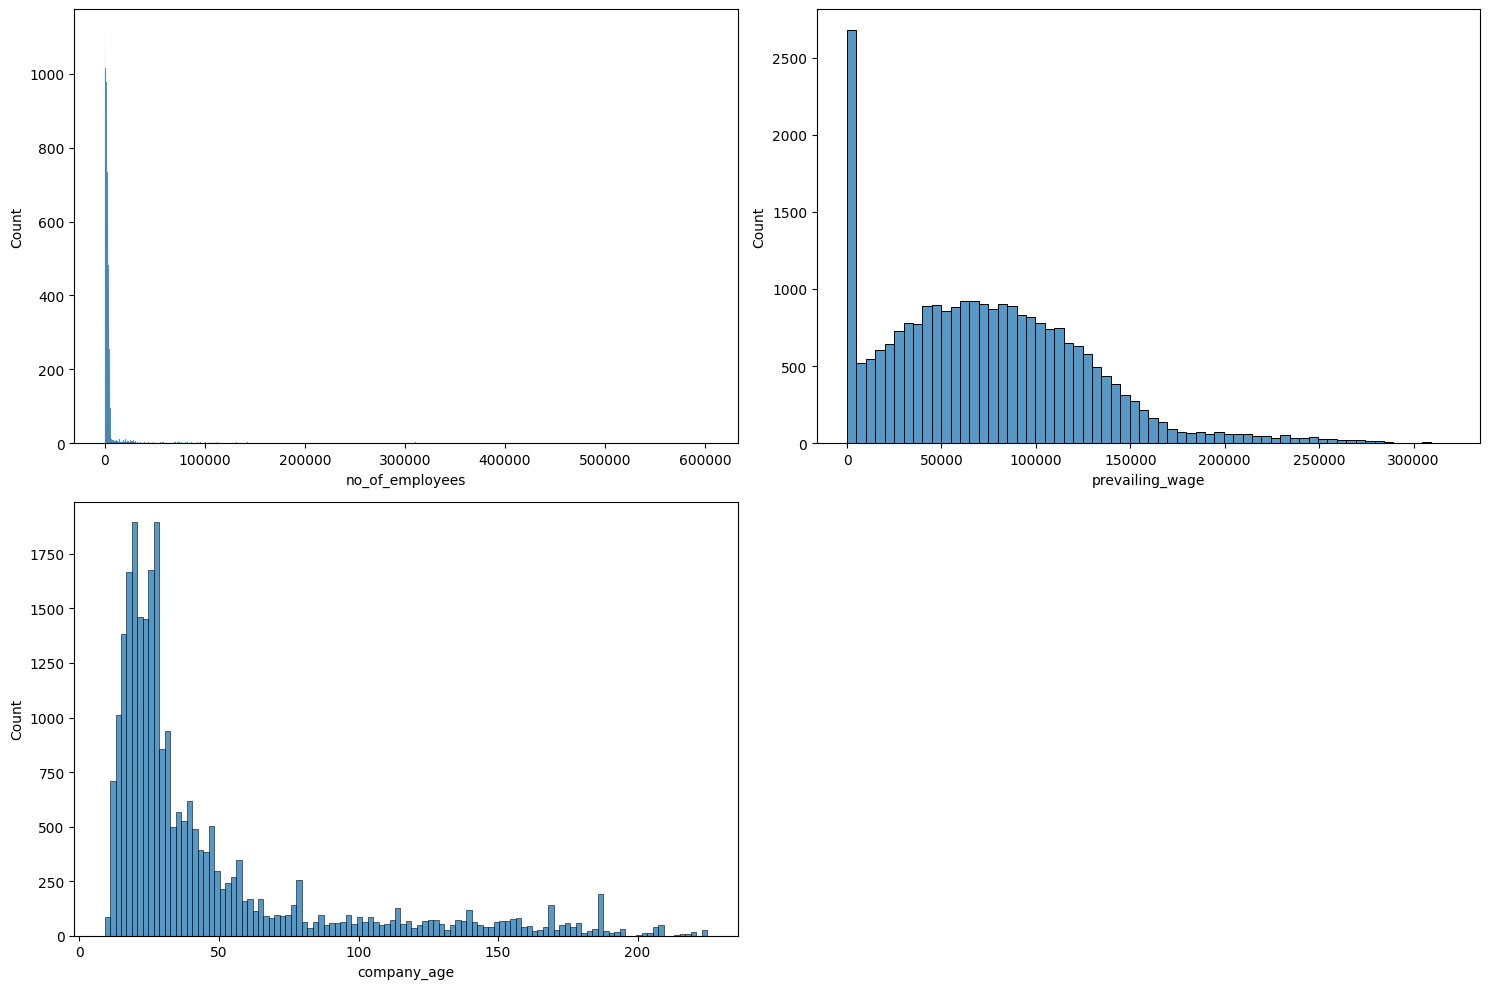

In [38]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_features):
    plt.subplot(2,2,i+1)
    sns.histplot(X[col])
    plt.xlabel(col)
    plt.tight_layout()

No of employees and Copmany age column is skewed
Apply a power transform featurewise to make data more Gaussian-like.
Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

Checking Skewness

What is Skewness ?

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [39]:
X[continous_features].skew(axis=0,skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

apply power transformers to check if it reduces outliers


In [40]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson")
transform_features=["company_age","no_of_employees"]
X_copy=pt.fit_transform(X[transform_features])

In [41]:
X_copy=pd.DataFrame(X_copy,columns=transform_features)

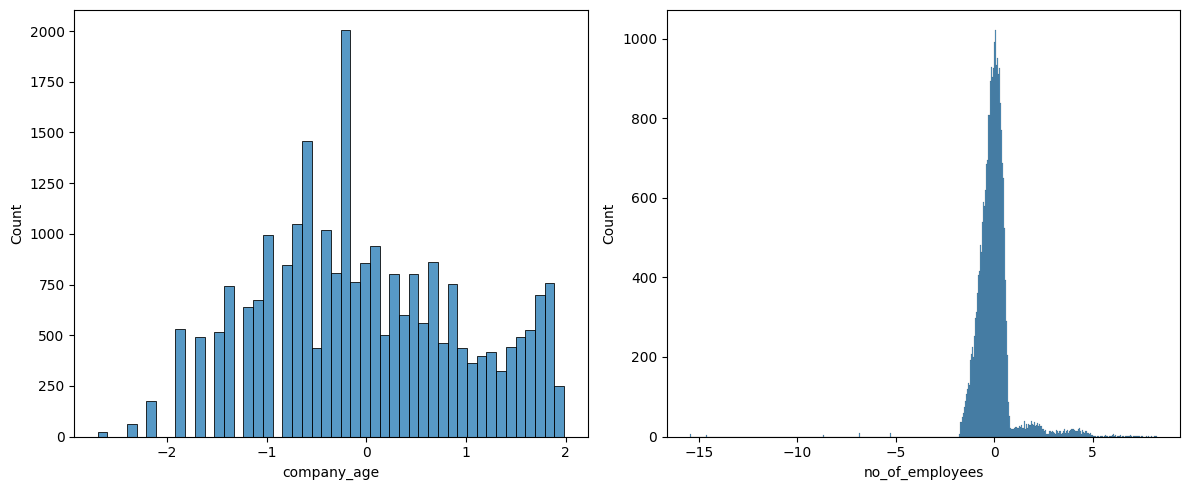

In [46]:
plt.figure(figsize=(12,5))
for i,col in enumerate(transform_features):
    plt.subplot(1,2,i+1)
    sns.histplot(X_copy[col])
    plt.xlabel(col)
    plt.tight_layout()

In [47]:
X_copy.skew(axis=0,skipna=True)

company_age        0.112260
no_of_employees    0.399339
dtype: float64

In [49]:
for feature in cat_features:
    print(feature ,":",df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


# Feature Encoding and Scaling
## One Hot Encoding for Columns which had lesser unique values and not ordinal

## One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Ordinal Encoding for Columns which has many unique categories

Ordinal encoding is used here as label encoder is supported for column transformer.
Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.
Standard Scaler

Standardize features by removing the mean and scaling to unit variance.
Power Transformer

Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.
Selecting number features for preprocessing

In [51]:
num_features=list(X.select_dtypes(exclude="object").columns)

In [52]:
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

# Preprocessing using column transformers

In [58]:
# create column  transformers with three types of transformers
or_columns=["has_job_experience","requires_job_training","full_time_position","education_of_employee"]
oh_columns=["continent","unit_of_wage","region_of_employment"]
transform_columns=["no_of_employees","company_age"]

from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# following are transformers

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
ordinal_encoder=OrdinalEncoder()

transform_pipe=Pipeline(steps=[
    ("transformer",PowerTransformer(method="yeo-johnson"))
])

# following is pipeline in which transformers are placed to transform data

preprocessor=ColumnTransformer(
    
    [
        ("OneHotEncoder",oh_transformer,oh_columns),
        ("OrdinalEncoder",ordinal_encoder,or_columns),
        ("Transformer",transform_pipe,transform_columns),
        ("StandardScaler",numeric_transformer,num_features)
    ]
    
)



In [59]:
X=preprocessor.fit_transform(X)

In [60]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]], shape=(25480, 24))

In [64]:
X.shape

(25480, 24)

# Classification

In [65]:
from imblearn.combine import SMOTETomek,SMOTEENN

# resampling the minority class .The Sarategy can be changed as required

smt =SMOTEENN(random_state=42,sampling_strategy="minority")
#Fit the model to generate data

X_res,y_res=smt.fit_resample(X,y)

# Train Test Split
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13629, 24), (13629,), (3408, 24), (3408,))

# Model Building

In [67]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from xgboost import XGBClassifier

In [68]:
def evaluate_clf(true,predicted):
    acc=accuracy_score(true,predicted)
    f1=f1_score(true,predicted)
    precision=precision_score(true,predicted)
    recall=recall_score(true,predicted)
    roc_aucc=roc_auc_score(true,predicted)
    return acc,f1,precision,recall,roc_aucc

In [69]:
models={
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "Logistic Regression":LogisticRegression(),
    "K-Nearest_Neighbors":KNeighborsClassifier(),
    "XGB Classifier":XGBClassifier(),
    "Support vector machines":SVC(),
    "AdaBoost Classifier":AdaBoostClassifier(),
}

In [101]:
# creating a function which takes data ,labels and model and return report

def evaluate_model(X,y,models):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list=[]
    accuracy_list=[]
    auc=[]
    
    for i in range(len(list(models))):
        
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        
        # prediction of training data
        train_pred=model.predict(X_train)
        
        # evaluating training predictions
        
        train_acc,train_f1,train_precision,train_recall,train_roc_aucc=evaluate_clf(y_train,train_pred)
        
        # prediction for testing data
        test_pred=model.predict(X_test)
        
        #evaluating testing predictions
        
        test_acc,test_f1,test_precision,test_recall,test_roc_aucc=evaluate_clf(y_test,test_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        
        print("training score for : ",list(models.keys())[i])
        print("Accuracy : ",train_acc)
        print("F1 Score : ",train_f1)
        print("Precision : ",train_precision)
        print("Recall : ",train_recall)
        print("Roc Accuracy : ",train_roc_aucc)
        
        print("---------------------------------------------")
        
        print("Testing Score of  : ",list(models.keys())[i])
        print("Accuracy : ",test_acc)
        accuracy_list.append(test_acc)
        print("F1 Score : ",test_f1)
        print("Precision : ",test_precision)
        print("Recall : ",test_recall)
        print("Roc Accuracy : ",test_roc_aucc)
        auc.append(test_roc_aucc)
        print()
        print("===============================================================================================================================================================")
        
        print("\n")
        
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report
    

# training models

In [102]:
base_model_report=evaluate_model(X_res,y_res,models)

Random Forest
training score for :  Random Forest
Accuracy :  1.0
F1 Score :  1.0
Precision :  1.0
Recall :  1.0
Roc Accuracy :  1.0
---------------------------------------------
Testing Score of  :  Random Forest
Accuracy :  0.9504107981220657
F1 Score :  0.9544105745886161
Precision :  0.9475093733261918
Recall :  0.9614130434782608
Roc Accuracy :  0.9494565217391304



Decision Tree
training score for :  Decision Tree
Accuracy :  1.0
F1 Score :  1.0
Precision :  1.0
Recall :  1.0
Roc Accuracy :  1.0
---------------------------------------------
Testing Score of  :  Decision Tree
Accuracy :  0.926056338028169
F1 Score :  0.9320021586616298
Precision :  0.9255091103965702
Recall :  0.9385869565217392
Roc Accuracy :  0.9249694986690327



Gradient Boosting
training score for :  Gradient Boosting
Accuracy :  0.8897204490424829
F1 Score :  0.8965374819301989
Precision :  0.9068374878150676
Recall :  0.8864688265722842
Roc Accuracy :  0.8899955146708309
-----------------------------------

In [103]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.950411
4,K-Nearest_Neighbors,0.941608
5,XGB Classifier,0.935153
1,Decision Tree,0.926056
2,Gradient Boosting,0.879108
6,Support vector machines,0.857101
7,AdaBoost Classifier,0.849178
3,Logistic Regression,0.725646


# here we can use top 2 or 3 models for hyper parameter tuning

In [110]:
# initialize few parameters for hyperparameter tuning
rf_params={
    "max_depth":[10,12,None,15,20],
    "max_features":["sqrt","log2",None],
    "n_estimators":[10,50,100,200]
}
knn_params={
    "algorithm":["auto","ball_tree","kd_tree","brute"],
    "weights":["uniform","distance"],
    "n_neighbors":[3,4,5,7,9]
}

Create a function for model training and report which can be used in hyperparameter tuning loop



In [114]:
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
    ("Knn",KNeighborsClassifier(),knn_params),
]

In [115]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}

for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
    random.fit(X_res,y_res)
    
    model_param[name]=random.best_params_
    
    for model_name in model_param:
        print(f"----------------------Best PArams for : {model_name}--------------------")
        print(model_param[model_name])

Fitting 3 folds for each of 60 candidates, totalling 180 fits
----------------------Best PArams for : RF--------------------
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}
Fitting 3 folds for each of 40 candidates, totalling 120 fits
----------------------Best PArams for : RF--------------------
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}
----------------------Best PArams for : Knn--------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


retraining the model with best param

In [117]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models={
    "Random Forest Classifier":RandomForestClassifier(**model_param["RF"]),
    "KNeighborsClassifier":KNeighborsClassifier(**model_param['Knn']),
                                                    
}
tuned_report=evaluate_model(X_res,y_res,best_models)

Random Forest Classifier
training score for :  Random Forest Classifier
Accuracy :  1.0
F1 Score :  1.0
Precision :  1.0
Recall :  1.0
Roc Accuracy :  1.0
---------------------------------------------
Testing Score of  :  Random Forest Classifier
Accuracy :  0.9477699530516432
F1 Score :  0.9519697787371829
Precision :  0.9453376205787781
Recall :  0.9586956521739131
Roc Accuracy :  0.946822315882875



KNeighborsClassifier
training score for :  KNeighborsClassifier
Accuracy :  1.0
F1 Score :  1.0
Precision :  1.0
Recall :  1.0
Roc Accuracy :  1.0
---------------------------------------------
Testing Score of  :  KNeighborsClassifier
Accuracy :  0.9683098591549296
F1 Score :  0.9710610932475884
Precision :  0.9577167019027484
Recall :  0.9847826086956522
Roc Accuracy :  0.9668811002661934





In [118]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.96831
0,Random Forest Classifier,0.94777


In [120]:
best_model=KNeighborsClassifier(**model_param["Knn"])
best_model=best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
score=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)

print("Final model KNN ")
print("Accuracy Score Value : {:.4f}".format(score))
print(cr)

Final model KNN 
Accuracy Score Value : 0.9683
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1568
           1       0.96      0.98      0.97      1840

    accuracy                           0.97      3408
   macro avg       0.97      0.97      0.97      3408
weighted avg       0.97      0.97      0.97      3408



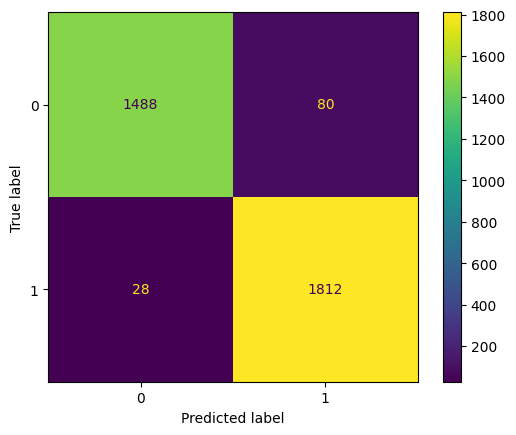

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model,X_test,y_test)

# Best Model is K_Nearest Neighbor(KNN) with Accuracy 96.50%

In [1]:
import pickle

In [4]:
with open("knn_model.pkl","wb") as f:
    pickle.dump("knn_model",f)
print("model saved successfully")
    

model saved successfully


In [6]:
with open("preprocessor.pkl","wb") as f:
    pickle.dump("preprocessor",f) 
print("preprocessor saved successfully")

preprocessor saved successfully
